In [1]:
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from os.path import join, isdir, dirname, abspath
from os import listdir
from typing import List
from pathlib import Path
import boto3
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
from collections import OrderedDict
import torch
from scipy.stats import linregress

from matplotlib import colors


root_path = dirname(abspath("./"))
import sys
sys.path.append(root_path)

from proT.subroutines.eval_sweeps import get_df_recursive, has_logs_subfolder, get_df_kfold_loss

In [2]:
def post_process_sweep(
    df: pd.DataFrame,
    compound_cols: List[dict],
    columns_name_map: dict=None,
    columns_to_dump: list=None
    ):
    
    df_ = df.copy()
    
    # extract sweeps and base info
    for compound_col in compound_cols:
        df_[compound_col["new_label"]] = df_[compound_col["old_label"]].str.extract(compound_col["regex"])
        df_[compound_col["new_label"]] = df_[compound_col["new_label"]].astype(compound_col["type"])
        
    if columns_name_map is not None:
        df_ = df_.rename(columns=columns_name_map)
        
    if columns_to_dump is not None:
        df_ = df_.drop(columns=columns_to_dump)
        
    return df_

In [4]:
#dirpath_sum = "../experiments/training/ds_size_study/ishigami_sum/combinations_new"
dirpath_cat = "../experiments/training/ds_size_study/ishigami_cat/combinations"
#df_sum = get_df_recursive(filepath=dirpath_sum, bottom_action=get_df_kfold_loss, is_bottom= has_logs_subfolder)
df_cat = get_df_recursive(filepath=dirpath_cat, bottom_action=get_df_kfold_loss, is_bottom= has_logs_subfolder)
df_cat

Failed to read ../experiments/training/ds_size_study/ishigami_cat/combinations/combo_d_base_emb_100_max_data_size_16000_seed_1/k_0/logs/csv/version_0/metrics.csv from disk: [Errno 2] No such file or directory: '../experiments/training/ds_size_study/ishigami_cat/combinations/combo_d_base_emb_100_max_data_size_16000_seed_1/k_0/logs/csv/version_0/metrics.csv'
Failed to read ../experiments/training/ds_size_study/ishigami_cat/combinations/combo_d_base_emb_100_max_data_size_16000_seed_1/k_1/logs/csv/version_0/metrics.csv from disk: [Errno 2] No such file or directory: '../experiments/training/ds_size_study/ishigami_cat/combinations/combo_d_base_emb_100_max_data_size_16000_seed_1/k_1/logs/csv/version_0/metrics.csv'
Failed to read ../experiments/training/ds_size_study/ishigami_cat/combinations/combo_d_base_emb_100_max_data_size_16000_seed_1/k_2/logs/csv/version_0/metrics.csv from disk: [Errno 2] No such file or directory: '../experiments/training/ds_size_study/ishigami_cat/combinations/combo_d

,k,val_loss,train_loss,test_loss,level_0
0,k_0,0.352012,0.002353,0.351939,combo_d_base_emb_100_max_data_size_16000_seed_10
1,k_1,0.622267,0.003354,0.644745,combo_d_base_emb_100_max_data_size_16000_seed_10
2,k_2,0.362946,0.002458,0.381621,combo_d_base_emb_100_max_data_size_16000_seed_10
3,k_3,0.329055,0.002431,0.358869,combo_d_base_emb_100_max_data_size_16000_seed_10
4,k_4,0.219466,0.005869,0.209420,combo_d_base_emb_100_max_data_size_16000_seed_10
...,...,...,...,...,...
0,k_0,0.180596,0.003369,0.051951,combo_d_base_emb_150_max_data_size_200_seed_9
1,k_1,0.149728,0.002303,0.216131,combo_d_base_emb_150_max_data_size_200_seed_9
2,k_2,0.217174,0.003184,0.204213,combo_d_base_emb_150_max_data_size_200_seed_9
3,k_3,0.445223,0.005360,0.303061,combo_d_base_emb_150_max_data_size_200_seed_9


In [5]:
columns_name_map = {
    "val_loss"  : "validation",
    "train_loss"  : "train",
    "test_loss"  : "test",
    "level_2": "sweep variable"
    }

compound_cols = [
        {
            "old_label" :"level_0",
            "new_label": ["d_emb", "ds size", "seed"],
            "regex":r"(\d+).+?(\d+).+?(\d+)", 
            "type":int}
        ]

columns_to_dump = [
    "level_0",
]

#df_S = post_process_sweep(df_sum, compound_cols, columns_name_map, columns_to_dump)
df_C = post_process_sweep(df_cat, compound_cols, columns_name_map, columns_to_dump)
df_C

,k,validation,train,test,d_emb,ds size,seed
0,k_0,0.352012,0.002353,0.351939,100,16000,10
1,k_1,0.622267,0.003354,0.644745,100,16000,10
2,k_2,0.362946,0.002458,0.381621,100,16000,10
3,k_3,0.329055,0.002431,0.358869,100,16000,10
4,k_4,0.219466,0.005869,0.209420,100,16000,10
...,...,...,...,...,...,...,...
0,k_0,0.180596,0.003369,0.051951,150,200,9
1,k_1,0.149728,0.002303,0.216131,150,200,9
2,k_2,0.217174,0.003184,0.204213,150,200,9
3,k_3,0.445223,0.005360,0.303061,150,200,9


<Axes: xlabel='d_emb', ylabel='train'>

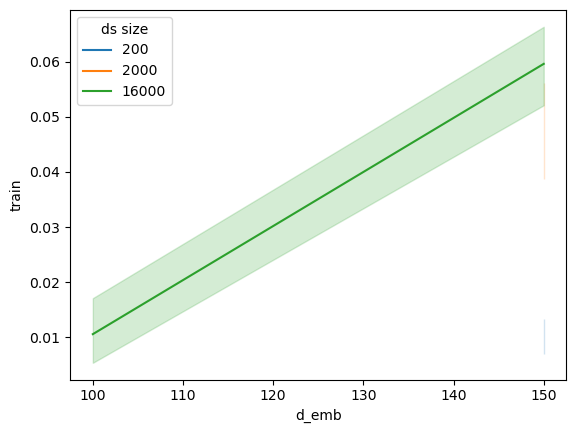

In [6]:
sns.lineplot(df_C, x="d_emb",y="train", hue="ds size", palette="tab10")

<Axes: xlabel='d_emb', ylabel='train'>

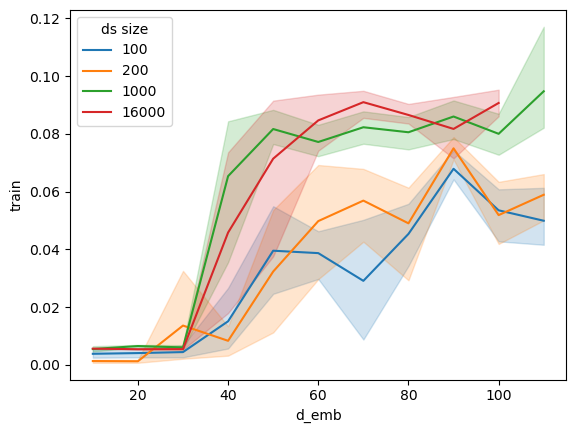

In [ ]:
sns.lineplot(df_S, x="d_emb",y="train", hue="ds size", palette="tab10")

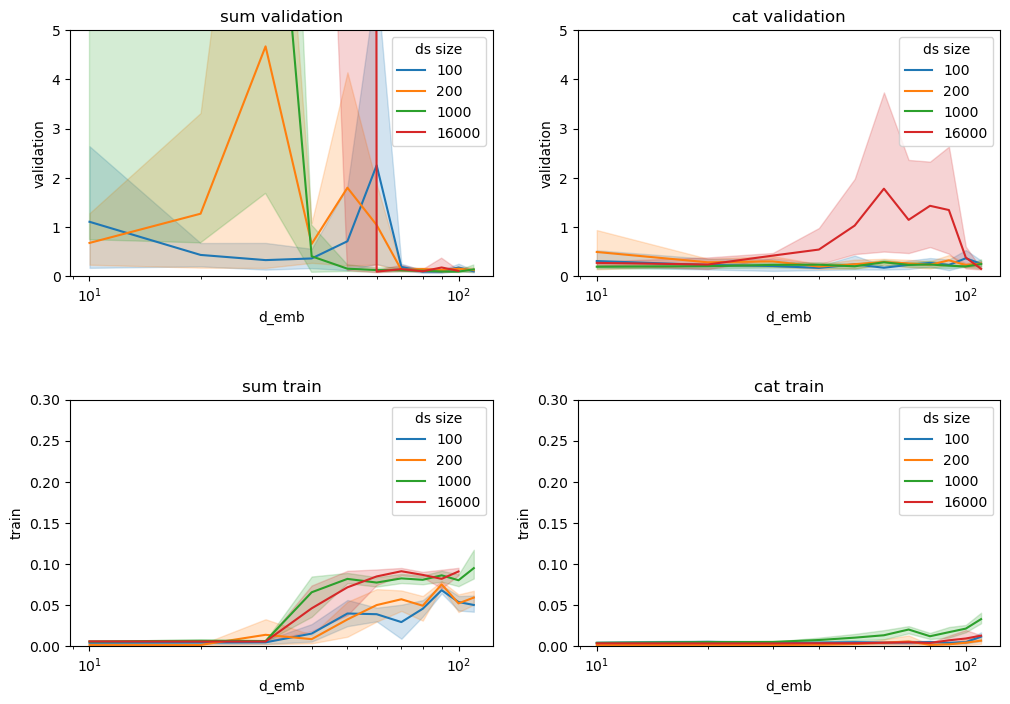

In [ ]:
val_lim = (0,5)
train_lim = (0,0.3)
fig = plt.figure(figsize=(12,8))
g = GridSpec(2,2,
             hspace=0.5)
ax0 = fig.add_subplot(g[0,0])
sns.lineplot(df_S, x="d_emb",y="validation", hue="ds size", ax=ax0, palette="tab10")
ax0.set_ylim(val_lim)
ax0.set_title("sum validation")
ax1 = fig.add_subplot(g[1,0])
sns.lineplot(df_S, x="d_emb",y="train", hue="ds size", palette="tab10", ax=ax1)
ax1.set_ylim(train_lim)
ax1.set_title("sum train")
ax2 = fig.add_subplot(g[0,1])
sns.lineplot(df_C, x="d_emb",y="validation", hue="ds size", ax=ax2, palette="tab10")
ax2.set_ylim(val_lim)
ax2.set_title("cat validation")
ax3 = fig.add_subplot(g[1,1])
sns.lineplot(df_C, x="d_emb",y="train", hue="ds size", palette="tab10", ax=ax3)
ax3.set_title("cat train")
ax3.set_ylim(train_lim)

ax0.set_xscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")


